In [2]:
import pandas as pd
import sklearn

In [3]:
pd.__version__

'1.4.2'

In [4]:
sklearn.__version__

'1.0.2'

In [5]:
jan_trips_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [6]:
jan_trips_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [9]:
jan_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

<h2>Question 1: Read the data for January. How many columns are there?</h2>

In [7]:
jan_trips_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [8]:
jan_trips_df.shape

(3066766, 19)

<b>Answer: </b>number of columns in the Dataset is 19

<h2>Question 2: What's the standard deviation of the trips duration in January?</h2>

In [19]:
jan_trips_df['duration'] = jan_trips_df.tpep_dropoff_datetime - jan_trips_df.tpep_pickup_datetime
jan_trips_df['duration'] = jan_trips_df['duration'].apply(lambda td: td.total_seconds() / 60)

In [24]:
jan_trips_df[['duration']]

,duration
0,8.433333
1,6.316667
2,12.750000
3,9.616667
4,10.833333
...,...
3066761,13.983333
3066762,19.450000
3066763,24.516667
3066764,13.000000


In [23]:
jan_trips_df['duration'].std()

42.594351241920904

<b>Answer: </b> The Standard Deviation is 42.59

<h2>Question 3: Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?</h2>

<AxesSubplot:>

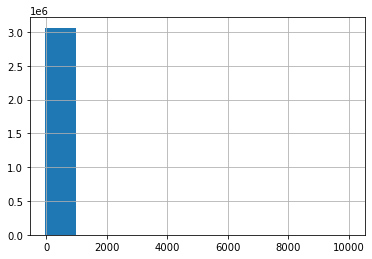

In [25]:
jan_trips_df['duration'].hist()

In [26]:
jan_trips_df.loc[jan_trips_df['duration']>= 1 & jan_trips_df['duration'] <=60]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]